In [2]:
#| echo: false
import os
os.environ["OMP_NUM_THREADS"] = '1'

## Algoritmos de centroides

Los algorimos de centroides son los más usados y buscan puntos especiales llamados **centroides** que se usan para separar al espacio de acuerdo a su distancia. La noción de similaridad será dada por una función distancia, la más usual es la distancia euclidiana. 

El algoritmo más usado es el **k-means** ya que es simple y divide los conjuntos de datos de buena manera. A continuación se describirá la forma en la que k-means agrupa los datos.

Dado un conjunto de datos $\{x_1, \ldots, x_m\}$, el objetivo es encontrar $k$ centroides $\{c_1, \ldots, c_k\}$ para minimizar la función

$$ O = \sum _{i=1} ^{m}\min_j(d(x_i, c_j))$$

donde $d$ es la función distancia.

Queremos minimizar la distancia de cada punto a su representante (centroide) más cercano. Para esto, se hace el siguiente proceso iterativo:

1. Se eligen $k$ centroides de alguna manera (generalmente al azar)

2. Se asignan los datos a su centroide más cercano y así se crean los clusters $C_1, \ldots, C_k$

3. De cada cluster $C_i$, se elige el representante óptimo $c_i$ que minimiza la función

$$ \sum_{x\in C_i}d(x, c_i)$$

que se puede hacer tomando el promedio de los puntos del cluster.

Esto se repite hasta que los centroides cambian menos que un umbral establecido.


A continuación veremos un ejemplo de cómo funciona k-means con un conjunto de datos en 2 dimensions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

El conjunto de datos se creó con la función `make_blobs` con 400 puntos en 2 dimensiones agrupados en 5 clusters. En la siguiente imagen se muestran los datos creados, los colores indican los diferentes clusters.

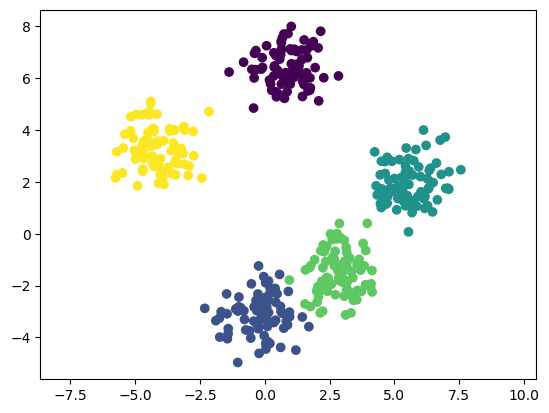

In [4]:
#| label: og-dataset
#| fig-cap: "El conjunto de datos original"

k = 5
X, y = make_blobs(400, 2, centers=k, cluster_std=.8 )
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

En las imágenes siguientes se muestra cómo se van creadon los clusters. En la iteración 1 las estrellas marcan el inicio de los centroides. Los colores indican los diferentes clustes iniciales. Note que la configuración inicial de los clusters es muy mala. Luego se actualizan los centroides (tomando el promedio) a las zonas marcadas con una equis. El proceso se repite en la iteración 2, 3 y 4. Note cómo se van actualizando los centroides hasta formar perfectamente los cluster de los datos.

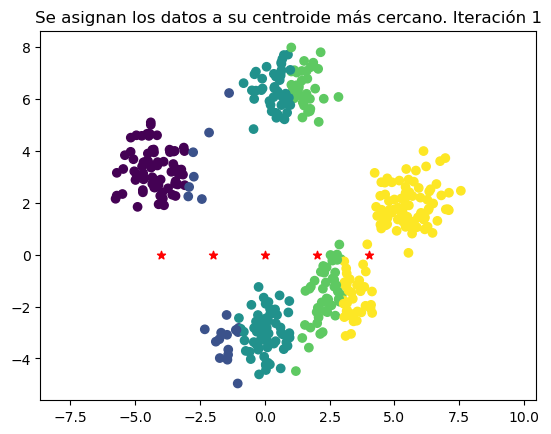

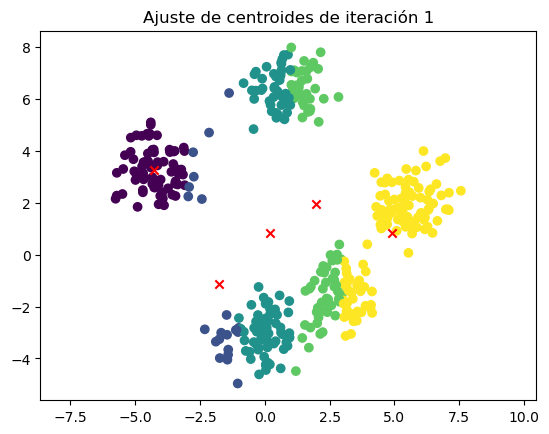

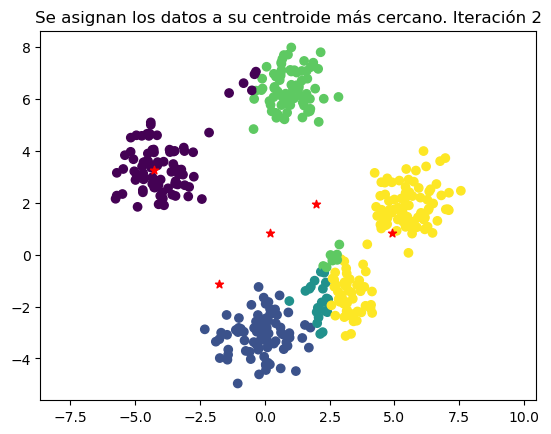

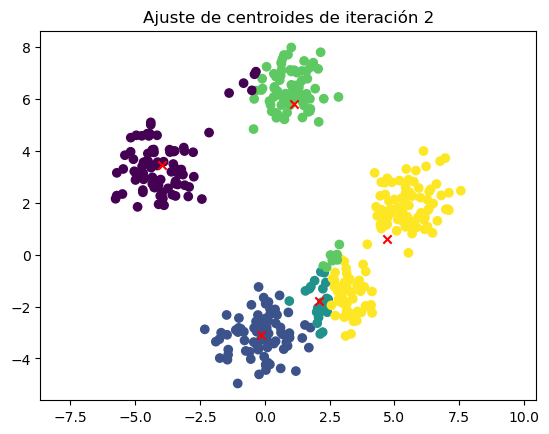

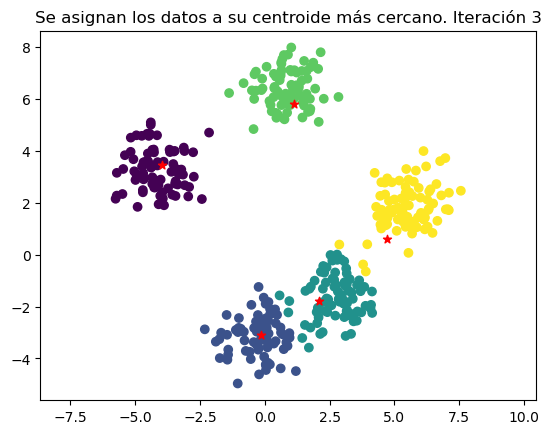

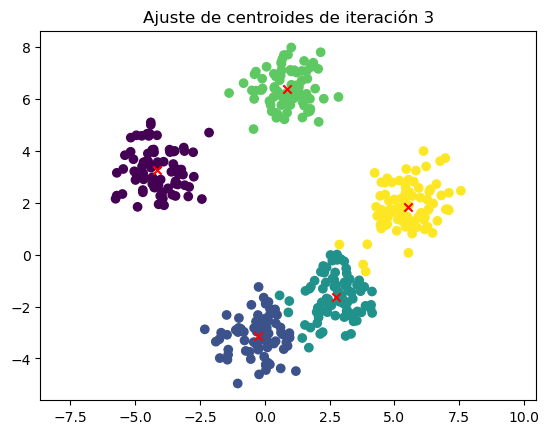

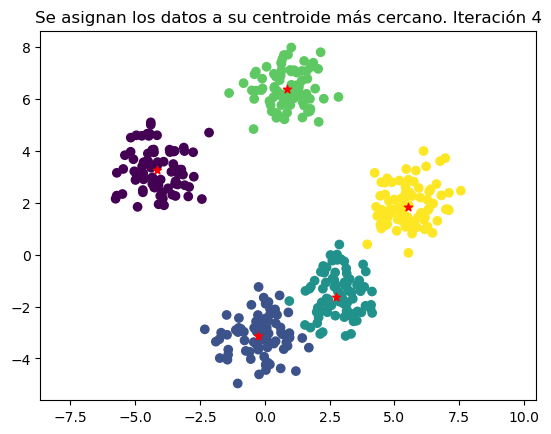

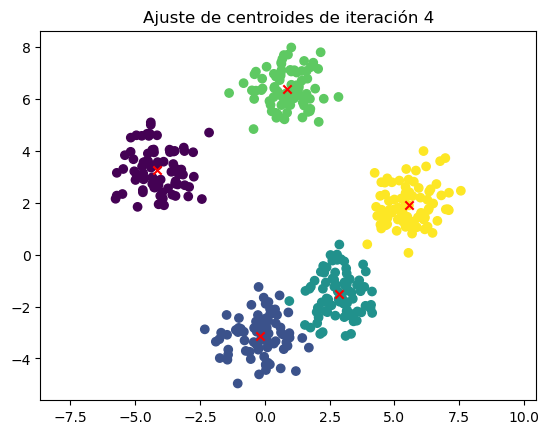

In [5]:
init = np.array([[2*i-4,0] for i in range(k)])

km = KMeans(k, init=init, max_iter=1, n_init=1)
km.fit(init)
y_km_0 = km.predict(X)

for i in range(4):
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=y_km_0)
    plt.scatter(init[:,0], init[:,1], marker='*', c='r')
    plt.title(f'Se asignan los datos a su centroide más cercano. Iteración {i+1}')
    plt.show()

    km = KMeans(k, init=init, max_iter=1, n_init=1)
    y_km = km.fit_predict(X)
    
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=y_km_0)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', c='r')
    plt.title(f'Ajuste de centroides de iteración {i+1}')
    plt.show()
    
    init = km.cluster_centers_
    y_km_0 = y_km

Como podemos ver, los centroides ya no se modificarán aunque continuemos con las iteraciones. En este punto se cumple la condición de paro y el algoritmo termina.

Note que los centroides iniciales estaban en el centro y que el resultado final podría variar dependiendo de dónde inician, es por eso que en la implementación de k-means, se repite varias veces la construcción con diferentes posiciones iniciales de los centroides y al final se reporta la **mejor** partición.

La principal desventaja del algoritmo k-means es que el usuario debe elegir el parámetro $k$ antes de correr el algoritmo. La elección del número de cluster para un conjunto de datos puede ser un problema complejo. En ocasiones, la elección es fácil, por ejemplo, si tenemos imágenes con perros, gatos y caballos, lo más natural es elegir $k=3$. La mayoría de las veces, éste parámetro no va a ser aparente. Por ejemplo, si se tiene un conjunto de documentos y no se sabe de qué trata cada uno. 

## Ejemplo con una k incorrecta.

Ahora vamos a ver lo que pasa en un ejemplo muy sencillo cuando no se elige la $k$ adecuada. Iniciamos con el siguiente conjunto de datos.

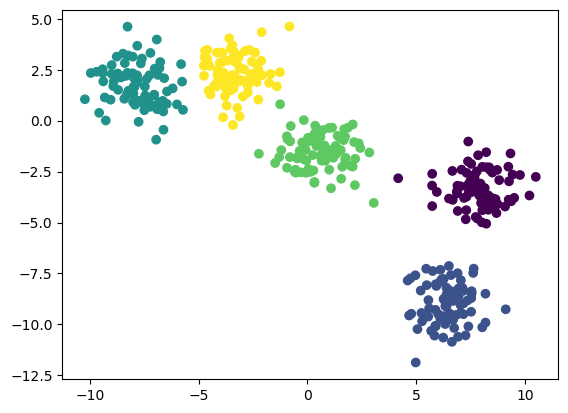

In [6]:
X, y = make_blobs(400, 2, centers=5, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Vamos a probar diferentes valores de $k$ y graficar la partición de los datos.

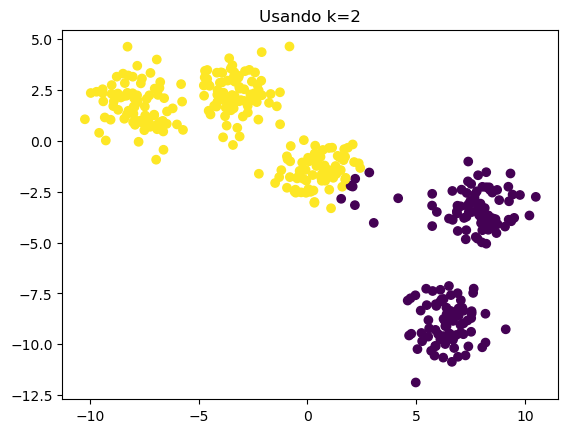

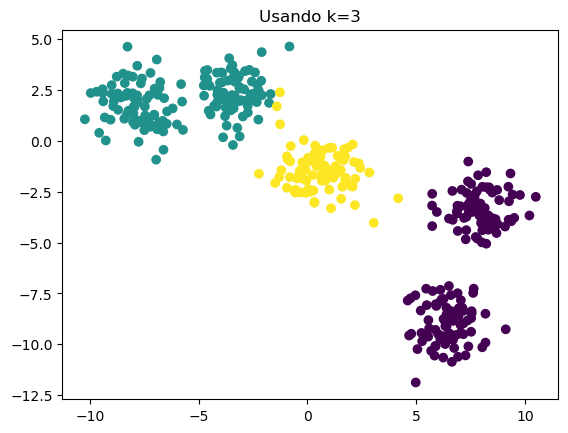

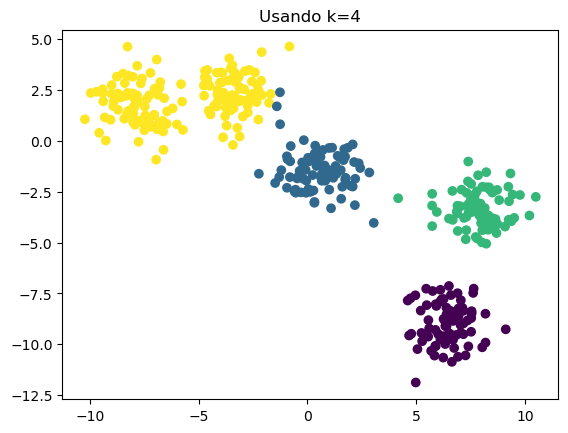

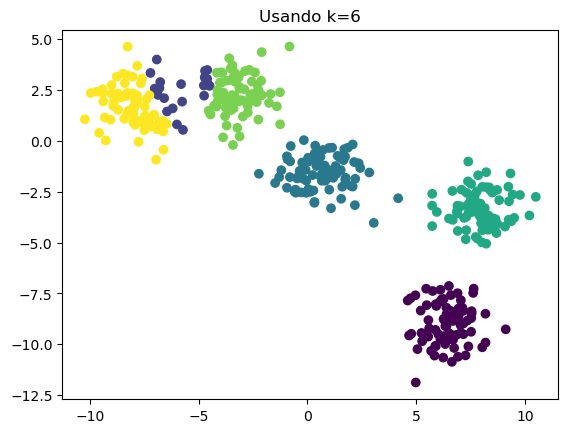

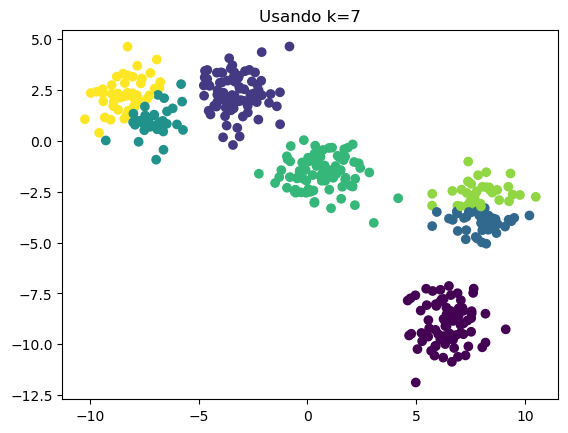

In [7]:
for K in [2,3,4,6,7]:
    km = KMeans(K)
    y_km = km.fit_predict(X)
    plt.title(f"Usando k={K}")
    plt.scatter(X[:, 0], X[:, 1], c=y_km)
    plt.show()

Podemos ver que cuando la $k$ es pequeña, se pegan los clusters mientras que cuando la $k$ es grande, se separan en 2 o más.

## Problemas con k-means

K-means es el algoritmo de formación de clusters más usado por su simpleza y sus buenos resultados. Aunque uno de sus principales problemas es que la forma de los cluster no puede ser arbitraria. Al final, los centroides son los que derterminan la posición y la forma de los clusters. Los centroides forman una **partición de Voronoi** que determina la forma de repartir el conjunto de datos. Las regiones de Voronoi deben ser **convexas**, por lo que los clusters terminan con esta propiedad. 

En el siguiente ejemplo se verá cómo se hace la partición cuando los clusters tiene formas *problemáticas*.

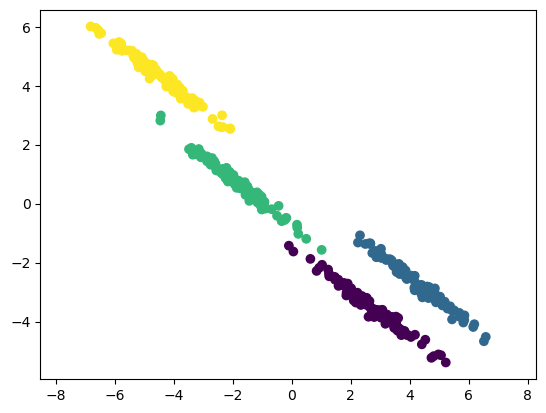

In [8]:
X, y = make_blobs(400, 2, centers=4, cluster_std=1, random_state=10)
trans = [[1, -0.8], [0.3, -0.1]]
X = np.dot(X, trans)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

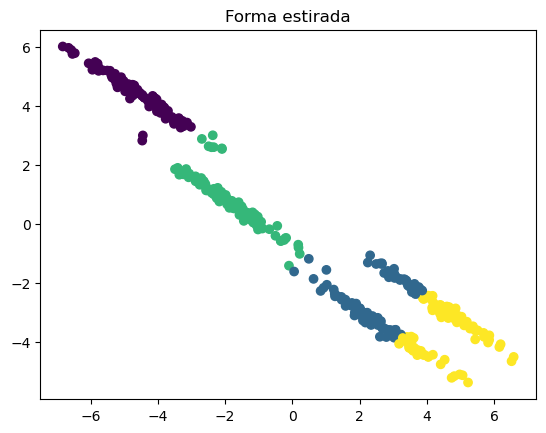

In [9]:
km = KMeans(4)
y_km = km.fit_predict(X)
plt.title(f"Forma estirada")
plt.scatter(X[:, 0], X[:, 1], c=y_km)
plt.show()

Otro problema es cuando el conjunto de datos tiene variaciones de denesidad. Esto puede causar una mala formación de los clusters como vemos en el siguiente ejemplo.

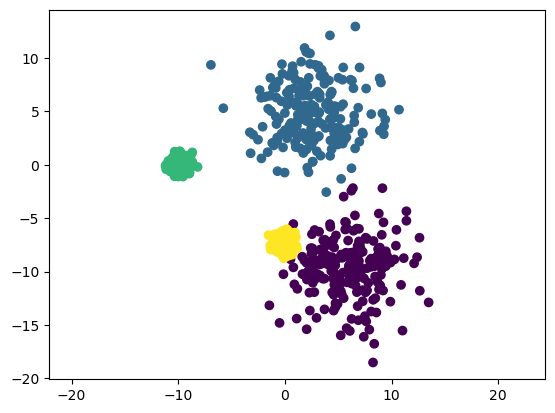

In [10]:
X, y = make_blobs(400, 2, centers=2, cluster_std=3, random_state=10)
X2, y2 = make_blobs(400, 2, centers=2, cluster_std=.5, random_state=9)
X = np.concatenate([X,X2])
y = np.concatenate([y,y2+2])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

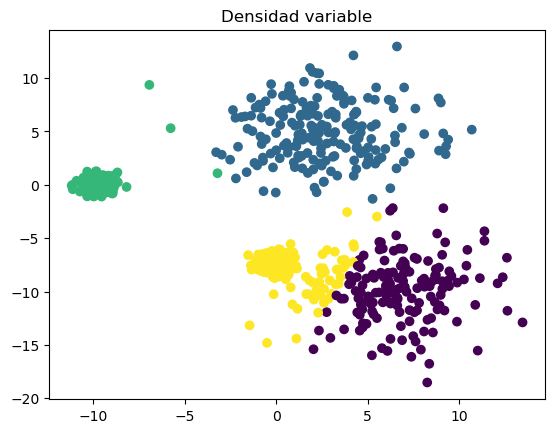

In [11]:
km = KMeans(4)
y_km = km.fit_predict(X)
plt.title(f"Densidad variable")
plt.scatter(X[:, 0], X[:, 1], c=y_km)
plt.show()

El algoritmo k-means es muy usado y suele dar buenos resultados. Debería ser la primera alternativa cuando se quiere agrupar un conjunto de datos por primera vez. Debido a sus limitaciones, existen alternativas que en general producen mejores resultados pero k-means nos sirve para darnos una idea inicial de cómo están distribuidos nuestros datos.